# COGS 108 - Final Project 

# Overview

As a group, we wanted to dig deeper into whether or not there was any association between income inequality and the level of crime experienced in different cities in the United States. As we explored our data and applied tests to said data, we saw that there was indeed a difference in crime rates between areas that did versus did not experience income inequality. However, upon further testing, we saw that the correlation between income inequality and crime was quite weak, making income inequality a weak predictor for crime index.

# Names

- Jaclyn Chin
- Elisa Lau
- Samuel Parker
- Elise Wong
- Fiona Wong

###### Group Members IDs

- A14579160
- A12764321
- A13665511
- A13026941
- A13779845

# Research Question

We want to shed light on the effects of economic inequality on society, and see if it has any effect on crime rates. We can tackle this topic from a data science perspective by narrowing down the question a bit more. The data science question we are asking is the following:  What is the correlation between street crime and economic inequality in the US? 
    
There are some important things to note about how we defined our terms. Firstly, the kind of crime we are looking at includes forms of violent crime and street crime - things like muggings, theft, and perhaps even murder. We are not currently interested in things like speeding or white collar crime.

Secondly, we are looking at economic inequality, not poverty. While it is fairly obvious that poverty and crime are related (with desperation comes drastic measures), we are trying to tease out the effect of income inequality in and of itself. It could be that inequality contributes to the disintegration of communities and crime in a fashion that is independent from the sheer effect of poverty.  Perhaps one community might have more crime in it than another even though they both have similar levels of poverty, due to the fact that the one community has a substantial level of inequality. Indeed, it’s possible that an unequally distributed increase in wealth could catalyze an upswing in crime. This will no doubt require close inspection to properly disambiguate the effects of poverty from the effects of inequality.

## Background and Prior Work

Due to developments in our current political climate, discussion about the harms of income inequality has become increasingly prevalent. Popular politicians such as Alexandria Ocasio-Cortez and Bernie Sanders have shined the floodlights on the glaring cleft that lies between the richest Americans and the rest of us.  A quick look at the numbers will show that the divide between rich and poor is growing in this country (1). With the advent of this apparent fact, many have begun researching the various ways in which increased income inequality affects society. 

We’re not the first group of people  to investigate the relationship between crime and income inequality. According to David Luther from Zippia, in 2016, the FBI released crime rate statistics that showed correlation between city crime and income inequality (2). The study looks at FBI data about property crime and violent crime and concluded that income inequality correlates the strongest with crime compared to other variables such as unemployment, poverty, and number of high school graduates where there was only weak correlation. In this paper, the results also show that robbery and burglary in the US are strongly affected by income inequality (3). On a larger scale, this journal article also describes how violent crime and income inequality are positively correlated when looking at different countries (4).

We can add something of value to the larger conversation by getting a better idea of exactly what kinds of crime interact with economic inequality. Rather than look at an aggregate of property and violent crimes, we want to look at the specific types of crimes that might correlate with income inequality in the United States. Types of crime we are interested in investigating include assault, robbery, arson, rape, and hate crimes. In terms of income inequality, we can also look at the different types of ways that income inequality is measured to give more context to our findings. For instance, looking at the mean, median, and standard deviation of income for each location and taking into account the state Gini index (discussed more in the Data section below).

References (include links):
- 1) https://www.thebalance.com/income-inequality-in-america-3306190
- 2) https://www.zippia.com/advice/crime-income-inequality/
- 3) https://www.researchgate.net/publication/23648005_Income_inequality_and_crime_in_the_United_States
- 4) https://www.jstor.org/stable/10.1086/338347?seq=1#page_scan_tab_contents

# Hypothesis


We expect to find a positive correlation between the rate of street crime and economic inequality in the US. There are news articles all over the internet that speculate about this particular correlation. It is a relationship that governments, organizations, economists, and sociologists have all studied a fair amount. In particular, as stated in the NYU Dispatch’s article “How big is income inequality as a determinant of crime rates?” from May 23, 2018, “[a] 2002 study by The World Bank found that crime rates and inequality are positively correlated, and an increase in income inequality has the effect of intensely increasing crime rates.”

# Dataset(s)

# instructions
*Fill in your dataset information here*

(Copy this information for each dataset)
- Dataset Name:
- Link to the dataset:
- Number of observations:

1-2 sentences describing each dataset. 

If you plan to use multiple datasets, add 1-2 sentences about how you plan to combine these datasets.

### Household Income Dataset

# SAM'S DATASCRAPING

### US Crime Dataset
- Dataset Name: UScrime_scraped.csv
- Link to the dataset: http://www.city-data.com/crime/index.html
- Number of observations: 9865

The data on US city crime was web scraped from City-Data which uses data from public records and agencies. Data for 9865 cities was scraped and 19 features for each city were collected (city, state, murders, rapes, burglarys, assaults, crime index, and more). There are total numbers of crimes committed per city, crimes per 100,000 population, and a crime index which is a value that gives more weight to certain crimes (for instance murder is weighted more heavliy than assault).

### Web Scraping for US Crime Data

In [ ]:
# Create empty arrays to fill with data
city = []
state = []
murders = []
murdersper = []
rapes = []
rapesper = []
robberies = []
robberiesper = []
assaults = []
assaultsper = []
burglaries = []
burglariesper = []
thefts = []
theftsper = []
auto_thefts = []
auto_theftsper = []
arsons = []
arsonsper = []
crime_index = []

# Array for city links while scraping each state
links = []

# No crime data for Hawaii
# States with only one link
states = ['Alaska', 'Alabama', 'Arkansas', 'Arizona', 'Colorado', 'Connecticut', 'Delaware', 'Iowa', 'Idaho',
          'Indiana', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',  'Minnesota', 
          'Mississippi',  'Montana', 'Nebraska', 'Nevada', 'New-Hampshire',  'New-Mexico', 'North-Carolina', 
          'North-Dakota',  'Oklahoma', 'Oregon','Rhode-Island', 'South-Carolina', 'South-Dakota', 'Tennessee',
          'Utah','Vermont', 'Virginia', 'Washington', 'West-Virginia', 'Wyoming']

# States with multiple links
multstates = ['California', 'California2','Florida' , 'Florida2','Georgia', 'Georgia2', 'Illinois','Illinois2', 
              'Illinois3', 'Illinois4' , 'Michigan', 'Michigan2', 'Missouri', 'Missouri2','New-Jersey', 
              'New-Jersey2', 'New-York', 'New-York2','Ohio', 'Ohio2', 'Pennsylvania','Pennsylvania2', 
              'Pennsylvania3', 'Texas','Texas2', 'Texas3', 'Wisconsin', 'Wisconsin2']

# Loop through all of the states (this was done in two parts with states and multstates)
for currstate in multstates:
    # Make a get request
    response = rq.get('http://www.city-data.com/crime/crime-' + currstate + '.html', proxies=proxies)

    # Get the html for the state page
    page_html = bsoup(response.text, 'html.parser')

    # Get the names for all of the cities and put them into a list
    lstcities = page_html.find(id = 'content')
    list(lstcities.children)
    lstref = list(lstcities.children)[7]
    list(lstref.children)

    # Create list with all html links for each city
    for link in lstref.find_all('a'):
        links.append(link.get('href'))

for citylink in links:
    # Make a get request
    cityresponse = rq.get('http://www.city-data.com/crime/' + citylink, proxies=proxies)
    # Sleep for a random time between loops so website does not get spammed
    time.sleep(random.randint(8,15))
    
    # Get the html for the city and find the crime data we want (types of crime, crime per 100k people, crime index)
    crimesoup = bsoup(cityresponse.text, 'html.parser')
    crimehtml = list(crimesoup.children)[2]
    crimebody = list(crimehtml.children)[3]
    crimeol = list(crimebody.children)[9] 
    crimeli = list(crimeol.children)[9]

    # Get city and state name
    citystate = crimeli.get_text()
    citystate = citystate.split(',')
    citya = citystate[0]
    currcity = citya.replace('Crime rate in ', '')
    city.append(currcity)
    statea = citystate[1]
    stateb = statea.split('(')
    state.append(stateb[0].strip())
    
    # Find the crime table
    table = crimesoup.find(id="crimeTab")
    b = list(table.children)[5]
    
    # Find murder numbers
    murd = list(b.children)[1]
    c = 0
    for i in list(murd.children):
        c = c+1
    murdnum = list(murd.children)[c-1]

    # Find numbers for total murders in 2017 and murders per 100,000 people
    d = 0
    for j in list(murdnum.children):
        d = d+1
    if (d == 1):
        murders.append(float('NaN'))
        murdersper.append(float('NaN'))
    else:
        murdtotal = int(list(murdnum.children)[0].replace(',', ''))
        murdper = list(list(murdnum.children)[2])[0]
        murdper = murdper[1:]
        murdper = float(murdper[:-1].replace(',', ''))
        murders.append(murdtotal)
        murdersper.append(murdper)

    # Get rape numbers
    ra = list(b.children)[3]
    ranum = list(ra.children)[c-1]
    d = 0
    for j in list(ranum.children):
        d = d+1
    if (d == 1):
        rapes.append(float('NaN'))
        rapesper.append(float('NaN'))
    else:
        # Get numbers for total rapes in 2017 and rapes per 100,000 people
        ratotal = int(list(ranum.children)[0].replace(',', ''))
        raper = list(list(ranum.children)[2])[0]
        raper = raper[1:]
        raper = float(raper[:-1].replace(',', ''))
        rapes.append(ratotal)
        rapesper.append(raper)
    
    # Get robbery numbers
    rob = list(b.children)[5]
    robnum = list(rob.children)[c-1]
    
    d = 0
    for j in list(robnum.children):
        d = d+1
    if (d == 1):
        robberies.append(float('NaN'))
        robberiesper.append(float('NaN'))
    else:
        # Get numbers for total robberies in 2017 and robberies per 100,000 people
        robtotal = int(list(robnum.children)[0].replace(',', ''))
        robper = list(list(robnum.children)[2])[0]
        robper = robper[1:]
        robper = float(robper[:-1].replace(',', ''))
        robberies.append(robtotal)
        robberiesper.append(robper)
        
    # Get assault numbers
    assau = list(b.children)[7]
    assaunum = list(assau.children)[c-1]
    d = 0
    for j in list(assaunum.children):
        d = d+1
    if (d == 1):
        assaults.append(float('NaN'))
        assaultsper.append(float('NaN'))
    else:
        # Get numbers for total assaults in 2017 and assaults per 100,000 people
        assautotal = int(list(assaunum.children)[0].replace(',', ''))
        assauper = list(list(assaunum.children)[2])[0]
        assauper = assauper[1:]
        assauper = float(assauper[:-1].replace(',', ''))
        assaults.append(assautotal)
        assaultsper.append(assauper)
    
    # Get burlgary numbers
    bur = list(b.children)[9]
    burgnum = list(bur.children)[c-1]
    d = 0
    for j in list(burgnum.children):
        d = d+1
    if (d == 1):
        burglaries.append(float('NaN'))
        burglariesper.append(float('NaN'))
    else:
        # Get numbers for total burglaries in 2017 and burglaries per 100,000 people
        burgtotal = int(list(burgnum.children)[0].replace(',', ''))
        burgper = list(list(burgnum.children)[2])[0]
        burgper = burgper[1:]
        burgper = float(burgper[:-1].replace(',', ''))
        burglaries.append(burgtotal)
        burglariesper.append(burgper)
        
    # Get theft numbers
    thef = list(b.children)[11]
    theftnum = list(thef.children)[c-1]
    d = 0
    for j in list(theftnum.children):
        d = d+1
    if (d == 1):
        thefts.append(float('NaN'))
        theftsper.append(float('NaN'))
    else:
        # Get numbers for total thefts in 2017 and thefts per 100,000 people
        thefttotal = int(list(theftnum.children)[0].replace(',', ''))
        theftper = list(list(theftnum.children)[2])[0]
        theftper = theftper[1:]
        theftper = float(theftper[:-1].replace(',', ''))
        thefts.append(thefttotal)
        theftsper.append(theftper)
        
    # Get auto theft numbers
    authef = list(b.children)[13]
    autotheftnum = list(authef.children)[c-1]
    d = 0
    for j in list(autotheftnum.children):
        d = d+1
    if (d == 1):
        auto_thefts.append(float('NaN'))
        auto_theftsper.append(float('NaN'))
    else:
        # Get numbers for total auto thefts in 2017 and auto thefts per 100,000 people
        autothefttotal = int(list(autotheftnum.children)[0].replace(',', ''))
        autotheftper = list(list(autotheftnum.children)[2])[0]
        autotheftper = autotheftper[1:]
        autotheftper = float(autotheftper[:-1].replace(',', ''))
        auto_thefts.append(autothefttotal)
        auto_theftsper.append(autotheftper)
    
    # Get arson numbers
    ar = list(b.children)[15]
    arsonnum = list(ar.children)[c-1]
    d = 0
    for j in list(arsonnum.children):
        d = d+1
    if (d == 1):
        arsons.append(float('NaN'))
        arsonsper.append(float('NaN'))
    else:
        # Get numbers for total arsons in 2017 and arsons per 100,000 people
        arsontotal = int(list(arsonnum.children)[0].replace(',', ''))
        arsonper = list(list(arsonnum.children)[2])[0]
        arsonper = arsonper[1:]
        arsonper = float(arsonper[:-1].replace(',', ''))
        arsons.append(arsontotal)
        arsonsper.append(arsonper)
    
    # Get crime index numbers
    cind = list(b.children)[17]
    cindnum = list(cind.children)[0]
    d = 0
    for j in list(cindnum.children):
        d = d+1
    crate = list(cindnum.children)[d-1]
    crimeind = float(list(crate.children)[0])
    crime_index.append(crimeind)

# Create a dataframe with all of the crime data collected
crime = pd.DataFrame({
        'city': city,
        'state': state,
        'murders': murders,
        'murdersper100k': murdersper,
        'rapes': rapes,
        'rapesper100k': rapesper,
        'robberies': robberies,
        'robberiesper100k': robberiesper,
        'assaults': assaults,
        'assaultsper100k': assaultsper,
        'burglaries': burglaries,
        'burglariesper100k': burglariesper,
        'thefts': thefts,
        'theftsper100k': theftsper,
        'autothefts': auto_thefts,
        'autotheftsper100k': auto_theftsper,
        'arson': arsons,
        'arsonper100k': arsonsper,
        'crime index': crime_index
    })
crime

# Export the crime dataframe as a csv file
crime.to_csv('crime_scrapingmultstates4.csv')

### Gini Index Dataset

- Dataset Name: city_gini_index.csv
- Link to the dataset: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_17_5YR_B19083&prodType=table
- Number of observations: 3573

The Gini Index Dataset was downloaded from American Fact Finder which allows users to search for datasets colleted by the United States Census Bureau. The data is from the 2017 American Community Survey and it has 3573 cities with their ID, location, estimated Gini Index, and margin of error.

We plan to combine the crime and income inequality datasets by merging them based on city and state values.

# Setup

In [1]:
# Import libraries
import time
import random
from bs4 import BeautifulSoup as bsoup
import requests as rq
import re
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

# Don't display too many rows/cols of DataFrames
pd.options.display.max_rows = 7
pd.options.display.max_columns = 10

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Cleaning

After loading the crime data and the income data, it was necessary for us to extract the county and state within the url in the place column of income_county.csv. After extracting, it had to be re-arranged and changed to match up with the county_name column in our crime data's csv. Columns are then re-organized. Then, the income column & percentile column are cleaned up to be changed into ints, so we could pivot the data, making each percentile (20th, 40th, etc.) into a column and organizing our data more aesthetically and usefully. After cleaning the ata within the income_co

In [2]:
# Load crime data
df_crime = pd.read_csv('UScrime_scraped.csv')
df_crime

,Unnamed: 0,city,state,murders,murdersper100k,...,autothefts,autotheftsper100k,arson,arsonper100k,crime index
0,0,Abbeville,Alabama,0.0,0.0,...,6.0,231.7,NaN,NaN,265.3
1,1,Adamsville,Alabama,1.0,23.1,...,15.0,346.1,NaN,NaN,468.4
2,2,Addison,Alabama,0.0,0.0,...,2.0,271.0,NaN,NaN,117.9
...,...,...,...,...,...,...,...,...,...,...,...
9862,9862,Torrington,Wyoming,0.0,0.0,...,3.0,44.6,0.0,0.0,91.5
9863,9863,Wheatland,Wyoming,0.0,0.0,...,7.0,194.3,0.0,0.0,117.2
9864,9864,Worland,Wyoming,0.0,0.0,...,3.0,56.7,0.0,0.0,118.4


In [3]:
# Load income data
df_income = pd.read_csv('economic_data.csv')
df_income

,Unnamed: 0,place,percentile,income,percent
0,0,https://statisticalatlas.com/place/Alabama/Ala...,95th,"0 177,359.000000\rdtype: object",0 241.881\rdtype: object
1,1,https://statisticalatlas.com/place/Alabama/Ala...,80th,"0 122,176.000000\rdtype: object",0 166.623\rdtype: object
2,2,https://statisticalatlas.com/place/Alabama/Ala...,60th,"0 85,277.000000\rdtype: object",0 116.300\rdtype: object
...,...,...,...,...,...
10869,3,https://statisticalatlas.com/place/Wyoming/Pow...,Median,"0 46,971.000000\rdtype: object",0 100.000\rdtype: object
10870,4,https://statisticalatlas.com/place/Wyoming/Pow...,40th,"0 40,583.000000\rdtype: object",0 86.400\rdtype: object
10871,5,https://statisticalatlas.com/place/Wyoming/Pow...,20th,"0 23,336.000000\rdtype: object",0 49.682\rdtype: object


In [4]:
# Extract city and state from url
df_income['citystate'] = df_income['place'].str.extract("place/(.*)/")
df_income['citystate']

0        Alabama/Alabaster
1        Alabama/Alabaster
2        Alabama/Alabaster
               ...        
10869       Wyoming/Powell
10870       Wyoming/Powell
10871       Wyoming/Powell
Name: citystate, Length: 10872, dtype: object

In [5]:
# Extract state
df_income['state'] = df_income['citystate'].str.extract("(.*)/")
df_income['state']

0        Alabama
1        Alabama
2        Alabama
          ...   
10869    Wyoming
10870    Wyoming
10871    Wyoming
Name: state, Length: 10872, dtype: object

In [6]:
# Extract city
df_income['city'] = df_income['citystate'].str.extract("/(.*)")
df_income['city']

0        Alabaster
1        Alabaster
2        Alabaster
           ...    
10869       Powell
10870       Powell
10871       Powell
Name: city, Length: 10872, dtype: object

In [7]:
# Remove place and citystate columns
df_income = df_income.drop(['place', 'citystate'], axis=1)
df_income

,Unnamed: 0,percentile,income,percent,state,city
0,0,95th,"0 177,359.000000\rdtype: object",0 241.881\rdtype: object,Alabama,Alabaster
1,1,80th,"0 122,176.000000\rdtype: object",0 166.623\rdtype: object,Alabama,Alabaster
2,2,60th,"0 85,277.000000\rdtype: object",0 116.300\rdtype: object,Alabama,Alabaster
...,...,...,...,...,...,...
10869,3,Median,"0 46,971.000000\rdtype: object",0 100.000\rdtype: object,Wyoming,Powell
10870,4,40th,"0 40,583.000000\rdtype: object",0 86.400\rdtype: object,Wyoming,Powell
10871,5,20th,"0 23,336.000000\rdtype: object",0 49.682\rdtype: object,Wyoming,Powell


In [8]:
# Reorder columns
df_income = df_income[['Unnamed: 0', 'city', 'state', 'percentile', 'income', 'percent']]
df_income

,Unnamed: 0,city,state,percentile,income,percent
0,0,Alabaster,Alabama,95th,"0 177,359.000000\rdtype: object",0 241.881\rdtype: object
1,1,Alabaster,Alabama,80th,"0 122,176.000000\rdtype: object",0 166.623\rdtype: object
2,2,Alabaster,Alabama,60th,"0 85,277.000000\rdtype: object",0 116.300\rdtype: object
...,...,...,...,...,...,...
10869,3,Powell,Wyoming,Median,"0 46,971.000000\rdtype: object",0 100.000\rdtype: object
10870,4,Powell,Wyoming,40th,"0 40,583.000000\rdtype: object",0 86.400\rdtype: object
10871,5,Powell,Wyoming,20th,"0 23,336.000000\rdtype: object",0 49.682\rdtype: object


In [9]:
# Remove zeroes in income and percent columns
df_income['income'] = df_income['income'].replace({'0 ':''}, regex = True)
df_income['percent'] = df_income['percent'].replace({'0 ':''}, regex = True)
df_income

,Unnamed: 0,city,state,percentile,income,percent
0,0,Alabaster,Alabama,95th,"177,359.000000\rdtype: object",241.881\rdtype: object
1,1,Alabaster,Alabama,80th,"122,176.000000\rdtype: object",166.623\rdtype: object
2,2,Alabaster,Alabama,60th,"85,277.000000\rdtype: object",116.300\rdtype: object
...,...,...,...,...,...,...
10869,3,Powell,Wyoming,Median,"46,971.000000\rdtype: object",100.000\rdtype: object
10870,4,Powell,Wyoming,40th,"40,583.000000\rdtype: object",86.400\rdtype: object
10871,5,Powell,Wyoming,20th,"23,336.000000\rdtype: object",49.682\rdtype: object


In [10]:
# Convert income to int
pd.options.mode.chained_assignment = None 
for i in range(0, len(df_income)):
    incomeConvert = df_income['income'][i]
    incomeConvert = incomeConvert[:(incomeConvert.find("."))]
    incomeConvert = incomeConvert.replace(',', "")
    incomeConvert = re.sub(r"^\s+", "", incomeConvert, flags=re.UNICODE)
    
    incomeConvert = int(float(incomeConvert))
    df_income['income'][i] = incomeConvert
    #print(incomeConvert)    

In [11]:
# Drop 'percent' column
# Make percentile columns 20th, 40th, Median, 60th, 80th, 95th
df_percentile = df_income.pivot_table(index=["state","city"], columns='percentile', values=['income'], aggfunc='first')
df_percentile.columns = df_percentile.columns.droplevel()
df_percentile = df_percentile.reset_index()
df_percentile.columns=df_percentile.columns.tolist()
df_percentile = df_percentile[['city','state','20th','40th','Median','60th','80th','95th']]
df_percentile

,city,state,20th,40th,Median,60th,80th,95th
0,Alabaster,Alabama,33578,61734,73325,85277,122176,177359
1,Albertville,Alabama,17270,27280,32042,43119,73798,128375
2,Alexander-City,Alabama,13295,23247,30442,38488,65625,133750
...,...,...,...,...,...,...,...,...
1567,Sheridan,Wyoming,20786,37456,48804,61526,95356,152329
1568,Torrington,Wyoming,18806,36662,41959,50048,86015,154477
1569,Worland,Wyoming,20148,32634,39904,52766,80107,165486


In [12]:
df = pd.merge(df_percentile, df_crime, on=['city','state'])
df = df.drop(['Unnamed: 0'], axis=1)
df

,city,state,20th,40th,Median,...,autothefts,autotheftsper100k,arson,arsonper100k,crime index
0,Alabaster,Alabama,33578,61734,73325,...,21.0,63.2,NaN,NaN,115.9
1,Albertville,Alabama,17270,27280,32042,...,90.0,416.9,NaN,NaN,200.0
2,Anniston,Alabama,12553,22337,30539,...,110.0,501.0,NaN,NaN,1302.8
...,...,...,...,...,...,...,...,...,...,...,...
921,Sheridan,Wyoming,20786,37456,48804,...,20.0,110.9,2.0,11.1,101.1
922,Torrington,Wyoming,18806,36662,41959,...,3.0,44.6,0.0,0.0,91.5
923,Worland,Wyoming,20148,32634,39904,...,3.0,56.7,0.0,0.0,118.4


In [13]:
# Create inequality column: 95th minus 20th
inequality = [0]*len(df)
for i in range(0,len(df)):
    inequality[i] = df['95th'][i] - df['20th'][i]

df['income inequality'] = inequality  
df

,city,state,20th,40th,Median,...,autotheftsper100k,arson,arsonper100k,crime index,income inequality
0,Alabaster,Alabama,33578,61734,73325,...,63.2,NaN,NaN,115.9,143781
1,Albertville,Alabama,17270,27280,32042,...,416.9,NaN,NaN,200.0,111105
2,Anniston,Alabama,12553,22337,30539,...,501.0,NaN,NaN,1302.8,131285
...,...,...,...,...,...,...,...,...,...,...,...
921,Sheridan,Wyoming,20786,37456,48804,...,110.9,2.0,11.1,101.1,131543
922,Torrington,Wyoming,18806,36662,41959,...,44.6,0.0,0.0,91.5,135671
923,Worland,Wyoming,20148,32634,39904,...,56.7,0.0,0.0,118.4,145338


In [14]:
df.to_csv('income_crime.csv')

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [9]:
# Import csv with crime and income data
crime_income_df = pd.read_csv('income_crime.csv')
crime_income_df.head()

,city,state,20th,40th,Median,...,autotheftsper100k,arson,arsonper100k,crime index,income inequality
0,Alabaster,Alabama,33578,61734,73325,...,63.2,NaN,NaN,115.9,143781
1,Albertville,Alabama,17270,27280,32042,...,416.9,NaN,NaN,200.0,111105
2,Anniston,Alabama,12553,22337,30539,...,501.0,NaN,NaN,1302.8,131285
3,Athens,Alabama,16777,33804,45920,...,46.1,NaN,NaN,140.2,182416
4,Auburn,Alabama,10718,26433,38912,...,155.8,NaN,NaN,217.4,187385


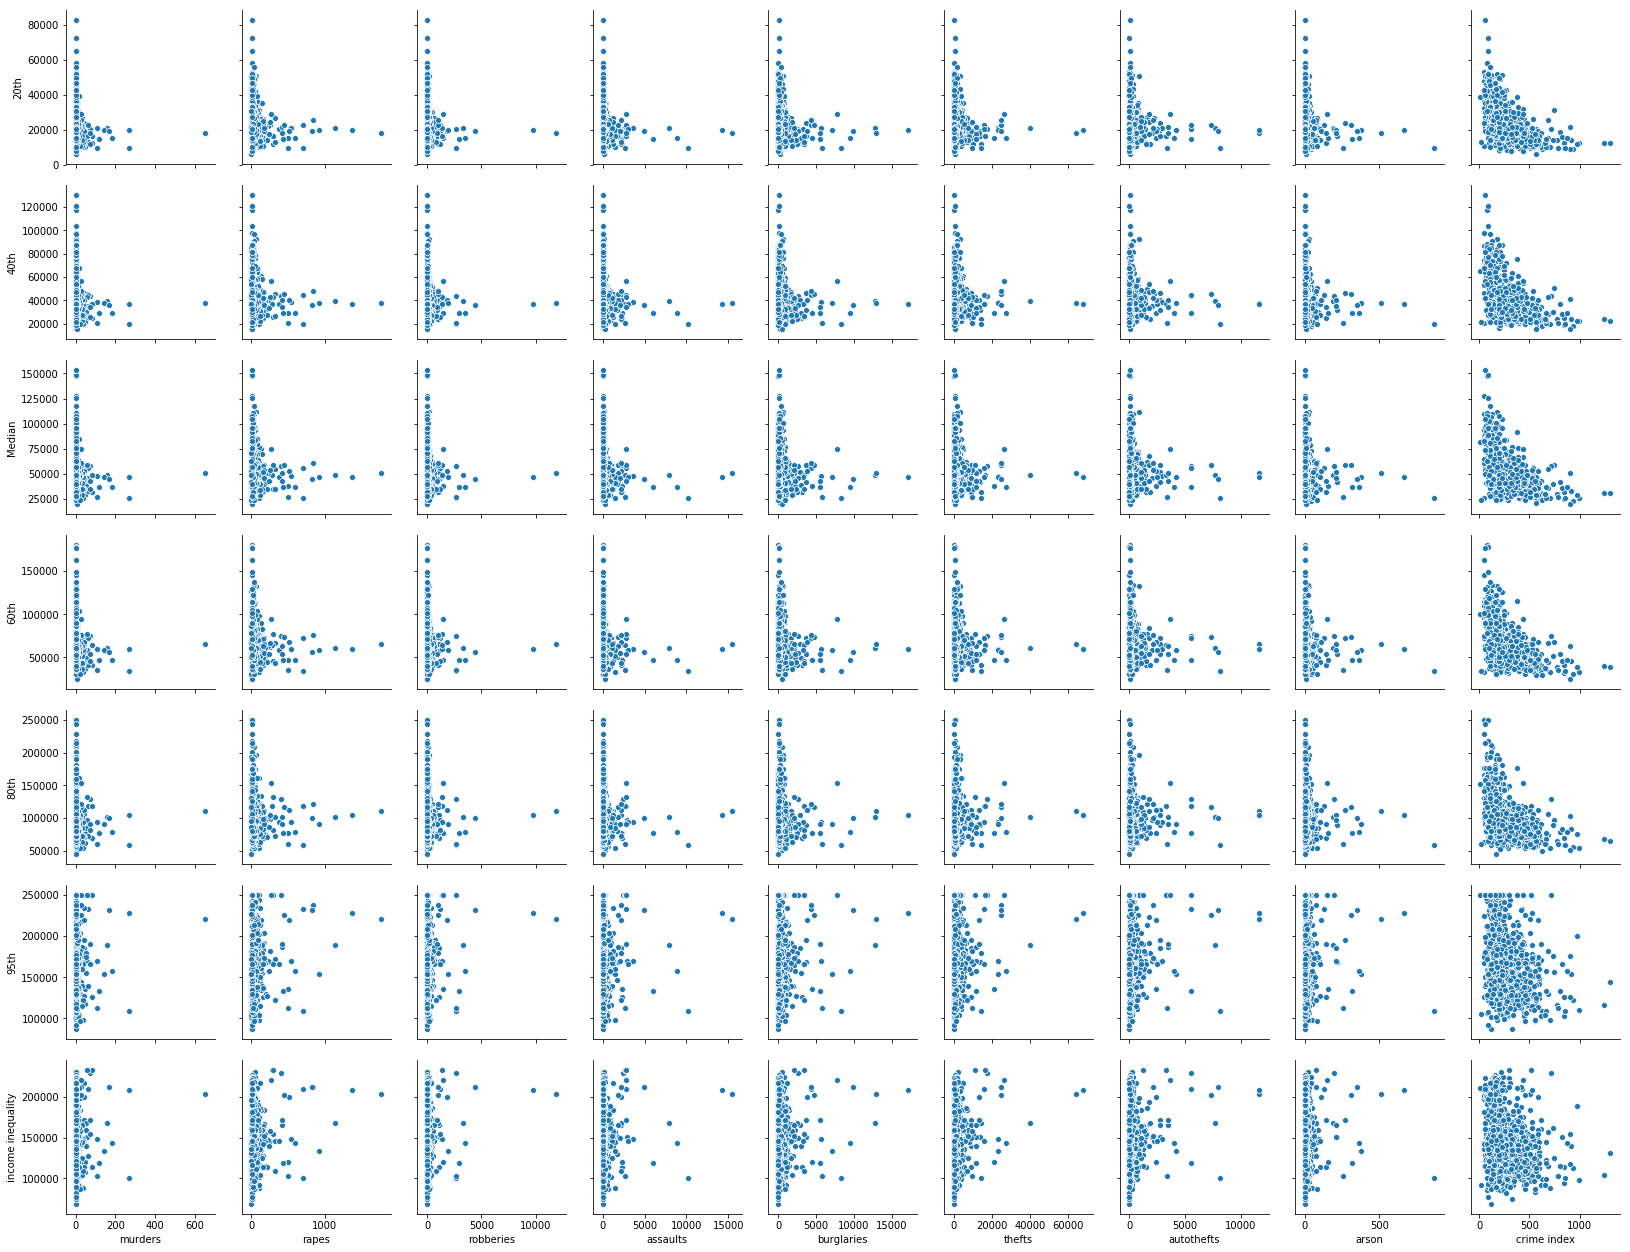

In [10]:
# Create a pair plot with income columns and total numbers for crime
sns.pairplot(crime_income_df, y_vars = ['20th', '40th', 'Median', '60th', '80th', '95th', 'income inequality'],
             x_vars = ['murders', 'rapes', 'robberies', 'assaults', 'burglaries', 'thefts', 'autothefts', 'arson', 
                       'crime index'])

Upon visual speculation, there appears to be a higher density of crime in general in areas where income at the 20th, 40th, 60th, and 80th percentile are lower. Meanwhile, when we take a look at the 95th percentile for income, areas with higher 95th percentile incomes appear to experience more murders, rapes, robberies, burglaries, thefts. Inspecting income ineqality on crime, we can see that there appears to be a higher density of crime in areas with higher income inequality, which we suspected. Rapes, assaults, autothefts, and arson have a bit more scatter, but they still appear to have an overall trend of increasing as income inequality increases. Arson may possibly have an outlier with the point indicating the highest number of arsons at a relatively lower income inequality.

In [11]:
# Get general statistics for income and crime data
(crime_income_df.describe()).round()

,20th,40th,Median,60th,80th,...,autotheftsper100k,arson,arsonper100k,crime index,income inequality
count,924.0,924.0,924.0,924.0,924.0,...,923.0,866.0,866.0,924.0,924.0
mean,22906.0,41615.0,52190.0,64373.0,99164.0,...,232.0,15.0,15.0,274.0,143365.0
std,9625.0,15647.0,18687.0,21774.0,30441.0,...,221.0,54.0,20.0,165.0,34556.0
...,...,...,...,...,...,...,...,...,...,...,...
50%,20567.0,37912.0,48156.0,59792.0,92406.0,...,168.0,3.0,10.0,236.0,136314.0
75%,27436.0,48671.0,60354.0,73607.0,110632.0,...,294.0,10.0,20.0,352.0,163504.0
max,82565.0,130119.0,153253.0,180125.0,250001.0,...,2702.0,869.0,228.0,1303.0,233753.0


# Ethics & Privacy

For common problems among ethics and privacy when collecting data, many did not apply to our study, such as informed consent and collection bias, due to fact that we did not use human subjects for our projects and are using public & government datasets. 
However, ethical issues we may need to consider would include the disclosure of data of minors, for example the perpetrator of a juvenile crime. Perhaps we can use data where crimes of minors are included as long as identities are anonymous or unknown.
At first, we considered focusing our project solely on the crimes performed by persons of legal age, thus removing information about minors from our datasets. All of the data sets we have looked at right now are public datasets, so we should be fine as far as permissions are concerned. Any identifying information have already been redacted to maintain confidentiality.
In terms of bias, there could be bias in the crime reporting and data that we are looking at since it is collected by humans. We also have to be aware of the bias and cultural issues around reporting certain crimes such as rape or hate crimes.

Using a default ethics checklist to cross-reference possible issues, it
# double check if using kaggle data set and add something about how analysis results could be used for laws and policy that negatively affect people
For other ethical issues to consider is honest representation of the data and consider if the data we've grabbed from public sources(Kaggle) and the government are always reliable. From checking the source on Kaggle we've implemented, there were listed sources from this scraped code. For crime, it was ICPSR of UMich, and as it is an established university, we're making the assumption that the data is reliable and permission was gathered. The other source is from the US Census Bureau, a public government source.
In terms of whether our research can indirectly harm others and serve as a source for others to profit off of, it's possible that there's always a chance to represent a source incorrectly. However, what we'll do to at least control some of this possibility is to not make outlandish claims from our data and stick with a factual conclusion truly based on what the data is showing. 

References:
1) http://deon.drivendata.org/#default-checklist
2) https://www.icpsr.umich.edu/icpsrweb/
3) https://census.gov/

# Conclusion & Discussion

*Fill in your discussion information here*